In [84]:
%matplotlib inline
import matplotlib.pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(15,6)})
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
import pydotplus

In [85]:
df = pd.read_csv('train_data_tree.csv')

In [86]:
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [87]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [88]:
X_train = df.drop(['num'], axis=1)

In [89]:
y_train =df['num']

In [90]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [97]:
N = clf.tree_.n_node_samples

In [96]:
en = clf.tree_.impurity

In [113]:
print(N, en)
en[0]-((N[1]/N[0])*en[1] + (N[4]/N[0])*en[4])
# 0.996-((157/238)*0.903 + (81/238)*0.826)

[238 157  53 104  81  16  65] [0.99587    0.90271134 0.61219613 0.97315604 0.82562653 0.954434
 0.77934984]


0.11939340343891591

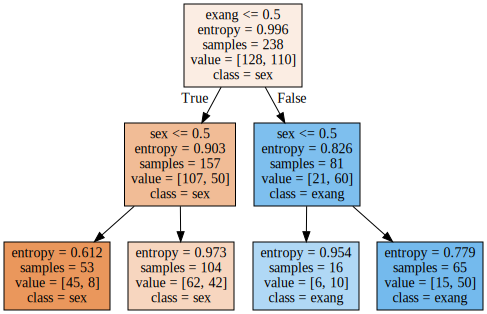

In [114]:
from IPython.display import SVG
from IPython.display import display
from graphviz import Source
from IPython.display import HTML
style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)
import os
os.environ['PATH'] +=os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

graph = Source(tree.export_graphviz(clf, out_file=None, 
                                    feature_names=list(X_train), 
                                    class_names=['sex', 'exang'], 
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

-------------------------

In [161]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris

In [153]:
iris = load_iris()
x = iris.data
y = iris.target

In [154]:
params={'min_samples_split': range(2,10),
        'max_depth' : range(1,10),
        'min_samples_leaf' : range(1,10)
       }

In [155]:
clf = DecisionTreeClassifier()

In [156]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [157]:
search = GridSearchCV(clf, params, cv=5)

In [158]:
search.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         

In [159]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [162]:
search = RandomizedSearchCV(clf, params, cv=5)

In [163]:
search.fit(x,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [164]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')